Suppose we have 10GB of images and only 1GB RAM.  
We pick a batch, calculate gradient over it, and update theta. But we go over all batches in one iteration/epoch.  

In [1]:
# for e in range(max_epoch) :  => Entire data is being iterated in one epoch but gradient is being calculated in batches
#     shuffle(data)  
#     for batch in all_batches :  
#         X', y' = load_batch  
#         grad = calc_grad(X', y')  
#         theta = theta - LR * grad  => Frequency of updates has increased
#                                    => Faster convergence (how?)
#                                    => Overall complexity remains same since we are doing thr same amount of work in one epoch

In [ ]:
# Updates can be noisy but we'll reach local minima faster since frequency of updates has increased

1) Faster convergence  
2.a) Noisy updates help to avoid local minima (NN, DL)  
2.b) More robust convergence  
3) Can use vectorisation (can't use in stochastic GD)  
4) No need to load entire data into the memory at the same time  

## Mini Batch Gradient Descent

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples = 10000, n_features = 20, n_informative = 20, noise = 10, random_state = 1)

u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - u) / std

In [5]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [6]:
def hypothesis(X, theta) :
    return np.dot(X, theta)

In [7]:
def error(X, y, theta) :
    y_ = hypothesis(X, theta)
    m = X.shape[0]
    e = np.sum((y_ - y) ** 2)
    return e / m

In [8]:
def gradient(X, y, theta) :
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    m = X.shape[0]
    return grad / m

In [84]:
def gradient_descent(X, y, batch_size = 200, learning_rate = 0.01, max_iters = 10) :
    # Batch size = 1 -> Stochastic GD,  Batch size = m -> Batch GD
    m, n = X.shape
    theta = np.zeros((n, ))
    error_list = []
    
    # Actually data is loaded in batched when it it needed using generators or something, and not entire data at once
    data = np.hstack((X, y.reshape(-1, 1)))
    
    for i in range(max_iters) :
        np.random.shuffle(data)
        total_batches = m // batch_size
        
        
        # Batch Gradient Descent
        # grad = gradient(X, y, theta)
        # theta = theta - learning_rate * grad
        
        # Mini Batch GD
        for j in range(total_batches) :
            batch_data = data[j * batch_size : (j + 1) * batch_size, : ]
            x_batch = batch_data[:, : -1]
            y_batch = batch_data[:, -1]
            grad = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate * grad
            e = error(x_batch, y_batch, theta)
            error_list.append(e)
            
    return theta, error_list

In [85]:
def r2_score(y, y_) :
    num = np.sum((y - y_) ** 2)
    denom = np.sum((y - y.mean()) ** 2)
    return (1 - num / denom)

In [86]:
theta, error_list = gradient_descent(X, y)

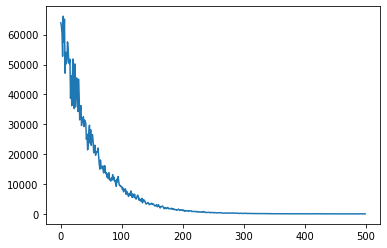

In [87]:
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

In [88]:
print(error_list[0], error_list[-1])

63942.81375288129 101.7973840717728
